<a href="https://colab.research.google.com/github/SabeehaMazahir/MachineLearning/blob/main/ML_CW_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import and install necessary libraries

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [85]:
pip install scipy

#### Import UCI dataset

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

#### Load the dataset

In [25]:
adult.metadata.target_col

['income']

In [27]:
adult.metadata.additional_info.summary

'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))\r\n\r\nPrediction task is to determine whether a person makes over 50K a year.\r\n'

In [28]:
adult.data.features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [29]:
adult.data.targets

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [31]:
df = adult.data.original

In [33]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [34]:
adult.data.headers

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [23]:
# df = pd.read_csv('https://archive.ics.uci.edu/dataset/2/adult')

# # Load the dataset
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# # Assign column names
# column_names = [
#     "age", "workclass", "fnlwgt", "education", "education-num",
#     "marital-status", "occupation", "relationship", "race", "sex",
#     "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
# ]
# df.columns = column_names

In [36]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [37]:
df.shape

(48842, 15)

In [38]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [40]:
# number of null values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [41]:
# number ofunique values in each column
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [42]:
# .T trnasposes the table, so rows become columns, optional, makes it easier to read
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [43]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [45]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [46]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [47]:
df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [48]:
# Replace the income values to ensure consistency
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Verify the changes
print(df['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [53]:
df.duplicated().sum()

48

In [55]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [56]:
# dropping duplicates
df = df.drop_duplicates()

In [57]:
df.shape

(48794, 15)

<Axes: xlabel='income', ylabel='count'>

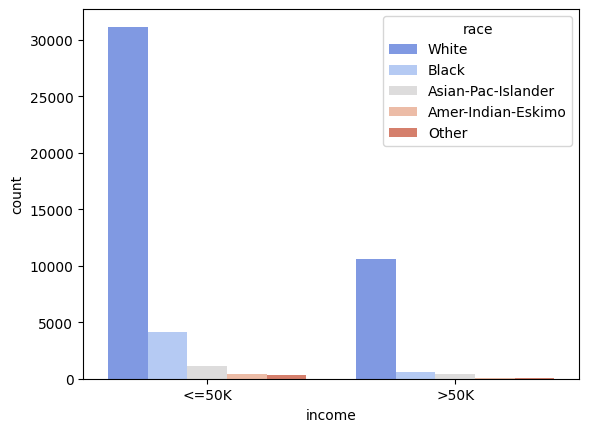

In [49]:
sns.countplot(x='income', palette='coolwarm', hue='race', data=df)

In [20]:
# filling the missing values
# method - replacing the values with the mode of each class

In [99]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')

<ipython-input-99-6f5fa00c80f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].replace('?', 'Private')
<ipython-input-99-6f5fa00c80f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
<ipython-input-99-6f5fa00c80f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [100]:
# filling missing values - categorical data filled with the mode
# df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [101]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [121]:
# df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [119]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [116]:
# df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [113]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [104]:
df.duplicated().sum()

5

In [105]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


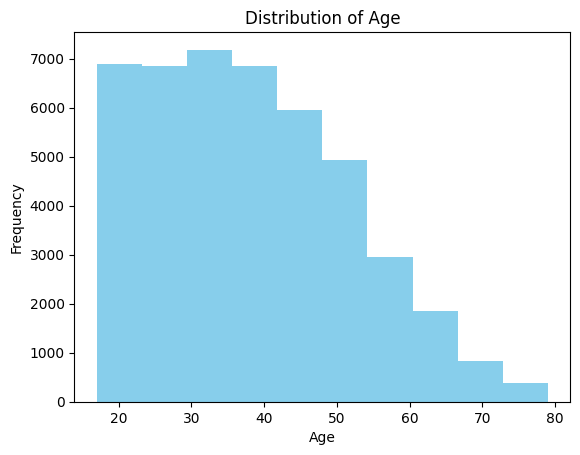

In [106]:
# Plot a histogram
plt.hist(df['age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

<ipython-input-107-5e1c43acbdbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


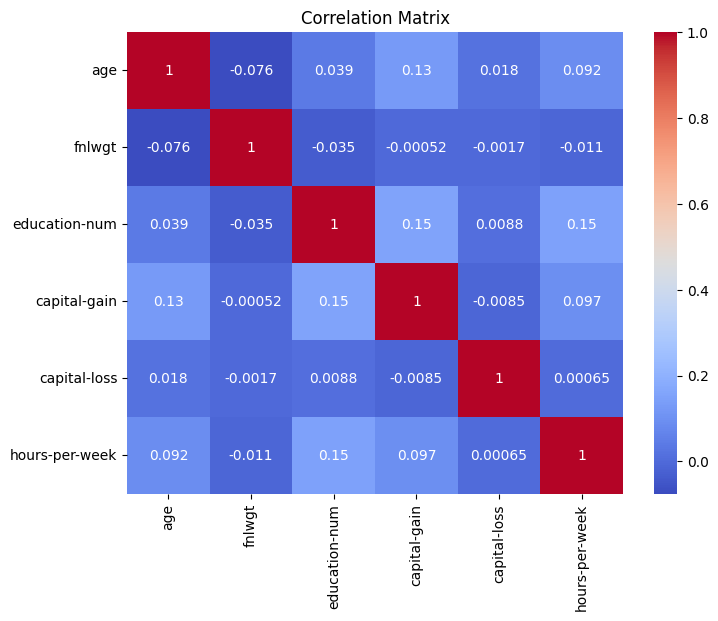

In [107]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

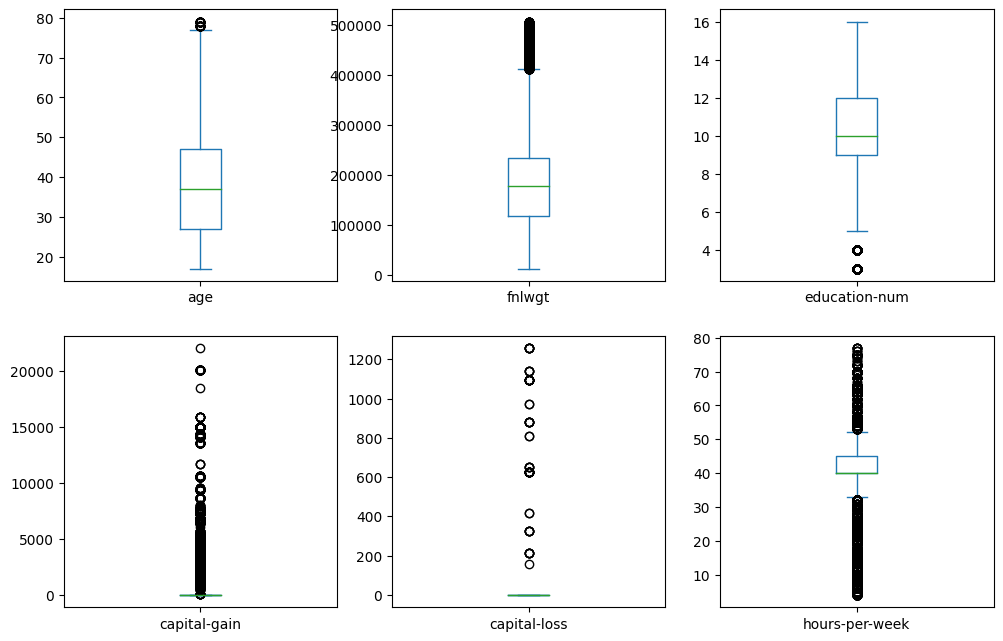

In [108]:
# Boxplot
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [120]:
from scipy import stats

# Calculate the Z-scores
z_scores = stats.zscore(df['age'])

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = df[abs(z_scores) > threshold]

# Display the outliers
print(outliers)
outliers.shape[0]

       age         workclass  fnlwgt     education  education-num  \
74      79           Private  124744  Some-college             10   
3338    79           Private  144533       HS-grad              9   
4720    79  Self-emp-not-inc  158319       HS-grad              9   
6000    79         Local-gov   84616          11th              7   
6173    79           Private  120707     Doctorate             16   
8176    79           Private  121318  Some-college             10   
8522    79           Private  333230       HS-grad              9   
11099   79           Private  165209       HS-grad              9   
11532   79           Private  142370   Prof-school             15   
14903   79      Self-emp-inc  309272       HS-grad              9   
16523   79           Private  163140       HS-grad              9   
17609   79      Self-emp-inc   97082          12th              8   
18141   79  Self-emp-not-inc   84979     Assoc-voc             11   
19828   79           Private  1722

29

In [122]:
import pandas as pd

# Assuming df is your DataFrame

# Create a boolean mask where '?' appears
mask = df.applymap(lambda x: x == '?')

# Count the number of True values in the mask (i.e., the number of '?' in the DataFrame)
num_question_marks = mask.sum().sum()

print("Number of '?' in the DataFrame:", num_question_marks)

Number of '?' in the DataFrame: 0


age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

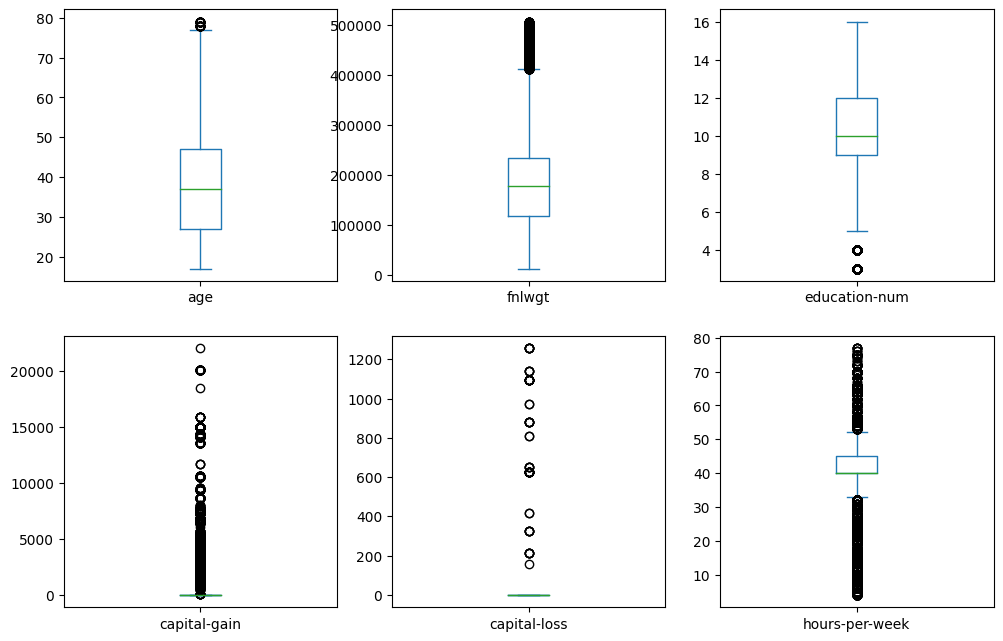

In [93]:
# Boxplot
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [23]:
# Feature engineering

In [24]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [25]:
# feature engineering - marital status: We make it simpler by reducing the categories
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married', 'not-married'])
df['marital-status'] = df['marital-status'].replace(['Married-spouse-absent', 'Divorced', 'Separated', 'Widowed'], 'other')

In [26]:
# feature engineering on: income - convert to numeric as 0s and 1s
df.income = df.income.replace(['<=50K'], 0)
df.income = df.income.replace(['>50K'], 1)

In [27]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [28]:
# correlation is for numeric data
df.corr()

# we can see that there is no high correlation, only normal to moderate correlation among variables. We dont have to be concerned about this.


<ipython-input-28-de652c8a4874>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<ipython-input-29-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

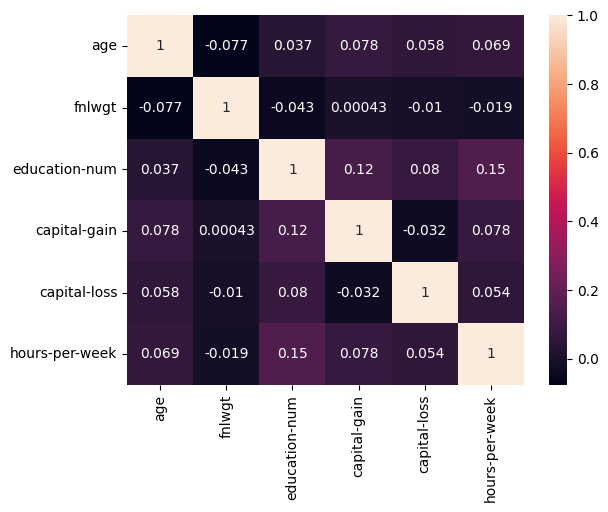

In [29]:
sns.heatmap(df.corr(), annot = True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

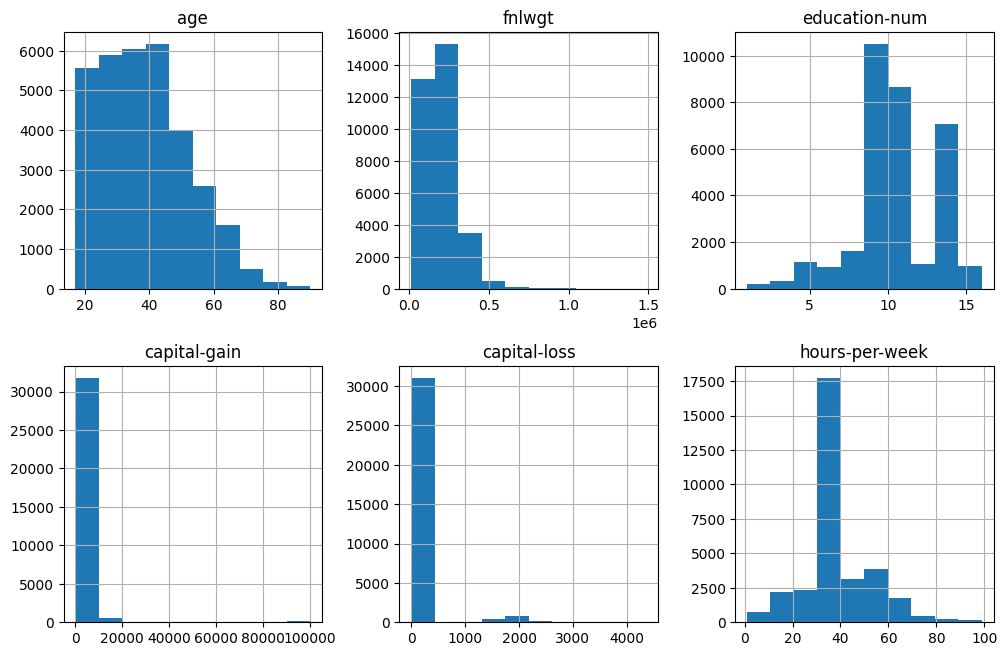

In [30]:
df.hist(figsize =(12,12), layout=(3,3))  # plots the histogram for the entire numeric data
# layout 3 rows, 3 cols

age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

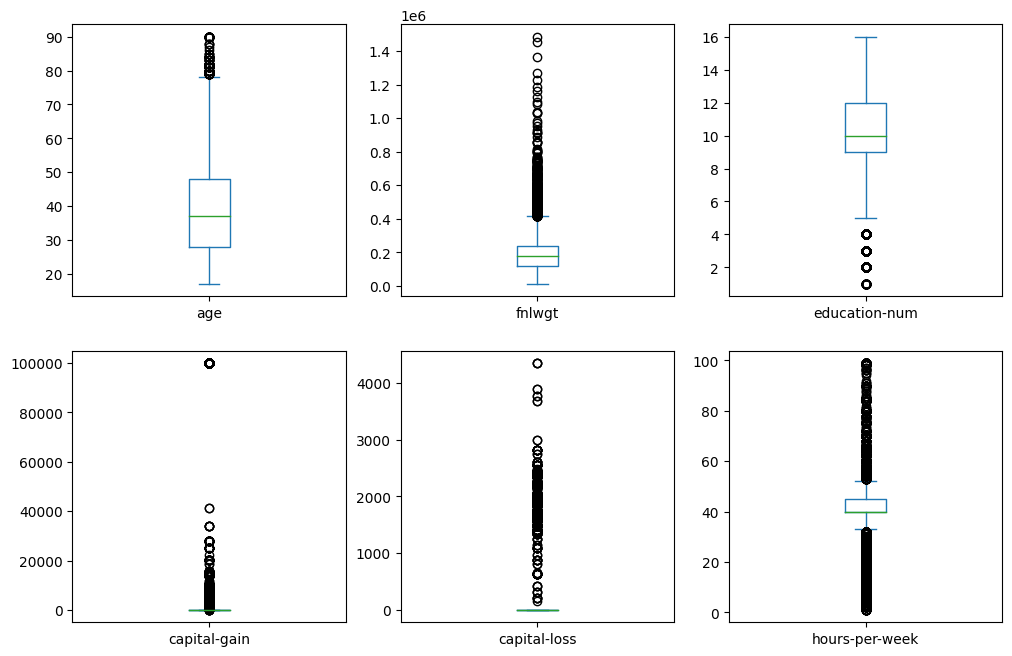

In [31]:
# Boxplot
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

In [32]:
# Model building
x = df.drop(['income'], axis=1)
y = df['income']

In [33]:
# Feature scaling - to make sure all values are of the same magnitude and non are give more importance

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [35]:
# LabelEncoder - converts the categorical variables to numeric and machine readable format
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [36]:
ss = StandardScaler().fit(df1.drop('income', axis=1))

In [37]:
x = ss.transform(df1.drop('income', axis=1))
y = df['income']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [39]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

In [40]:
# train the model
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB()

In [41]:
# evaluate our model
prediction = nbc.predict(x_test)

In [42]:
print("Accuracy on training data: ", nbc.score(x_train, y_train))
print("Accuracy on testing data: ", nbc. score(x_test, y_test))

Accuracy on training data:  0.8246753246753247
Accuracy on testing data:  0.8141058450199611


In [43]:
print(confusion_matrix(y_test, prediction))

[[6864  533]
 [1283 1089]]


In [44]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7397
        >50K       0.67      0.46      0.55      2372

    accuracy                           0.81      9769
   macro avg       0.76      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769



In [45]:
from sklearn.metrics import accuracy_score

In [46]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

print("Accuracy on training data: ", rfc.score(x_train, y_train))
print("Accuracy on testing data: ", rfc. score(x_test, y_test))

Accuracy on training data:  0.9999122499122499
Accuracy on testing data:  0.8543351417750026


In [47]:
print(confusion_matrix(y_test, prediction1))

[[6888  509]
 [ 914 1458]]


In [48]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7397
        >50K       0.74      0.61      0.67      2372

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

